In [1]:
# Importing import modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from skimage import io
print(os.listdir("../input/gestures-hand/data/data"))

['validation', 'test', 'train']


In [2]:
# Train, test and validation directories
train_dir = "../input/gestures-hand/data/data/train"
val_dir = "../input/gestures-hand/data/data/validation"
test_dir = "../input/gestures-hand/data/data/test"

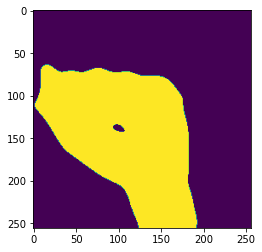

In [3]:
img_array1 = np.array(Image.open('../input/gestures-hand/data/data/train/fist/123.png'))
plt.imshow(img_array1)

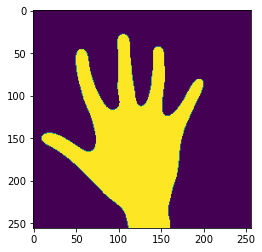

In [4]:
img_array2 = np.array(Image.open('../input/gestures-hand/data/data/train/five/123.png'))
plt.imshow(img_array2)

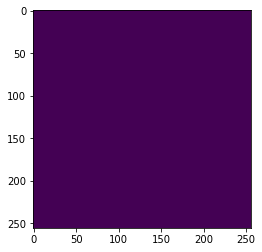

In [5]:
img_array3 = np.array(Image.open('../input/gestures-hand/data/data/train/none/123.png'))
plt.imshow(img_array3)

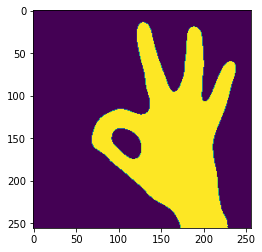

In [6]:
img_array4 = np.array(Image.open('../input/gestures-hand/data/data/train/okay/123.png'))
plt.imshow(img_array4)

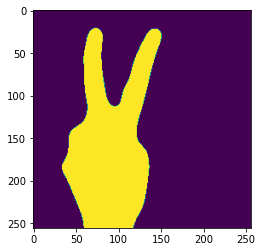

In [7]:
img_array5 = np.array(Image.open('../input/gestures-hand/data/data/train/peace/123.png'))
plt.imshow(img_array5)

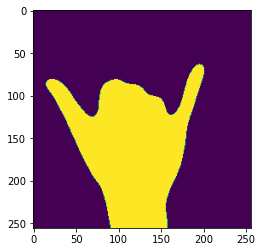

In [8]:
img_array6 = np.array(Image.open('../input/gestures-hand/data/data/train/rad/123.png'))
plt.imshow(img_array6)

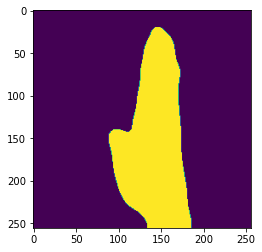

In [9]:
img_array7 = np.array(Image.open('../input/gestures-hand/data/data/train/straight/123.png'))
plt.imshow(img_array7)

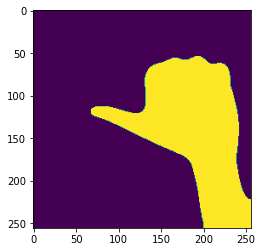

In [10]:
img_array8 = np.array(Image.open('../input/gestures-hand/data/data/train/thumbs/123.png'))
plt.imshow(img_array8)

In [11]:
# Declaring variables
outputSize = len(os.listdir(train_dir)) 
epochs = 30 # Number of epochs

In [12]:
# Train Data Generator to do data augmentation on training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [13]:
# Test Data Generator
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
# Setting up the train generator to flow from the train directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

# Doing the same as above for the validation directory
val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

Found 7999 images belonging to 8 classes.
Found 3999 images belonging to 8 classes.


In [15]:
# Function to create keras model for different number of gestures
def create_model(outputSize):
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (256,256,1)))
    model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = 2))
    model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = 2))
    model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
    model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = 2))
    model.add(Flatten())
    model.add(Dropout(rate = 0.5))
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(units = outputSize, activation = 'softmax'))
    model.compile(optimizer = Adam(lr=1e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [16]:
# Creating the model
model = create_model(outputSize)

In [17]:
# Summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 59, 59, 128)       7

In [19]:
# Fitting the model to the data based on a 32 batch size
history = model.fit_generator(
    train_generator,
    steps_per_epoch=outputSize*1000/32,
    epochs=2,
    validation_data=val_generator,
    validation_steps=outputSize*500/32
)

Epoch 1/2
250/250 [==============================] - 1834s 7s/step - loss: 1.1272 - accuracy: 0.5583 - val_loss: 0.5086 - val_accuracy: 0.7964
Epoch 2/2
250/250 [==============================] - 1846s 7s/step - loss: 0.5539 - accuracy: 0.7917 - val_loss: 0.2597 - val_accuracy: 0.9135


In [21]:
# Setting up the test generator to flow from the test directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

Found 4000 images belonging to 8 classes.


In [22]:
# Test accuracy and test loss calc
test_loss, test_acc = model.evaluate_generator(test_generator,steps = outputSize*500/32)
print("Test Acc:",test_acc)
print("Test Loss:",test_loss)

Test Acc: 0.9242500066757202
Test Loss: 0.2454230636358261
